In [ ]:
# Instalando bibliotecas faltantes no Google Colab
try:
    import pycaret
except:
    !pip install pycaret

try:
    import missingno
except:
    !pip install missingno

try:
    import umap.umap_ as umapl
except:
    !pip install 'umap-learn==0.5.4'

In [2]:
# Importando bibliotecas
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from pycaret.classification import setup
from imblearn.over_sampling import SMOTE

# Data preprocessing and analysis libraries
#import umap.umap_ as umap
#import umap.plot
import scipy.stats as stats
from scipy.stats import norm, skew

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Importando os dados
card_df = pd.read_csv('/content/drive/MyDrive/Colab_DataSets/Base.csv')
card_org = card_df.copy()

## Análise exploratória dos dados

In [4]:
# Quantidade total de transações e fraudes
colors = ['#004B87', 'LightBlue']
labels = ['Transação Normal', 'Transação Fraudulenta']
values = card_df['fraud_bool'].value_counts() / card_df['fraud_bool'].shape[0]
total_normal = card_df[card_df['fraud_bool'] == False].shape[0]
total_fraudulent = card_df[card_df['fraud_bool'] == True].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Gráfico Exploratório de Fraudes</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

fig.show()

In [5]:
# Estatística básica
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [6]:
card_df.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.036860e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565404  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

<Axes: >

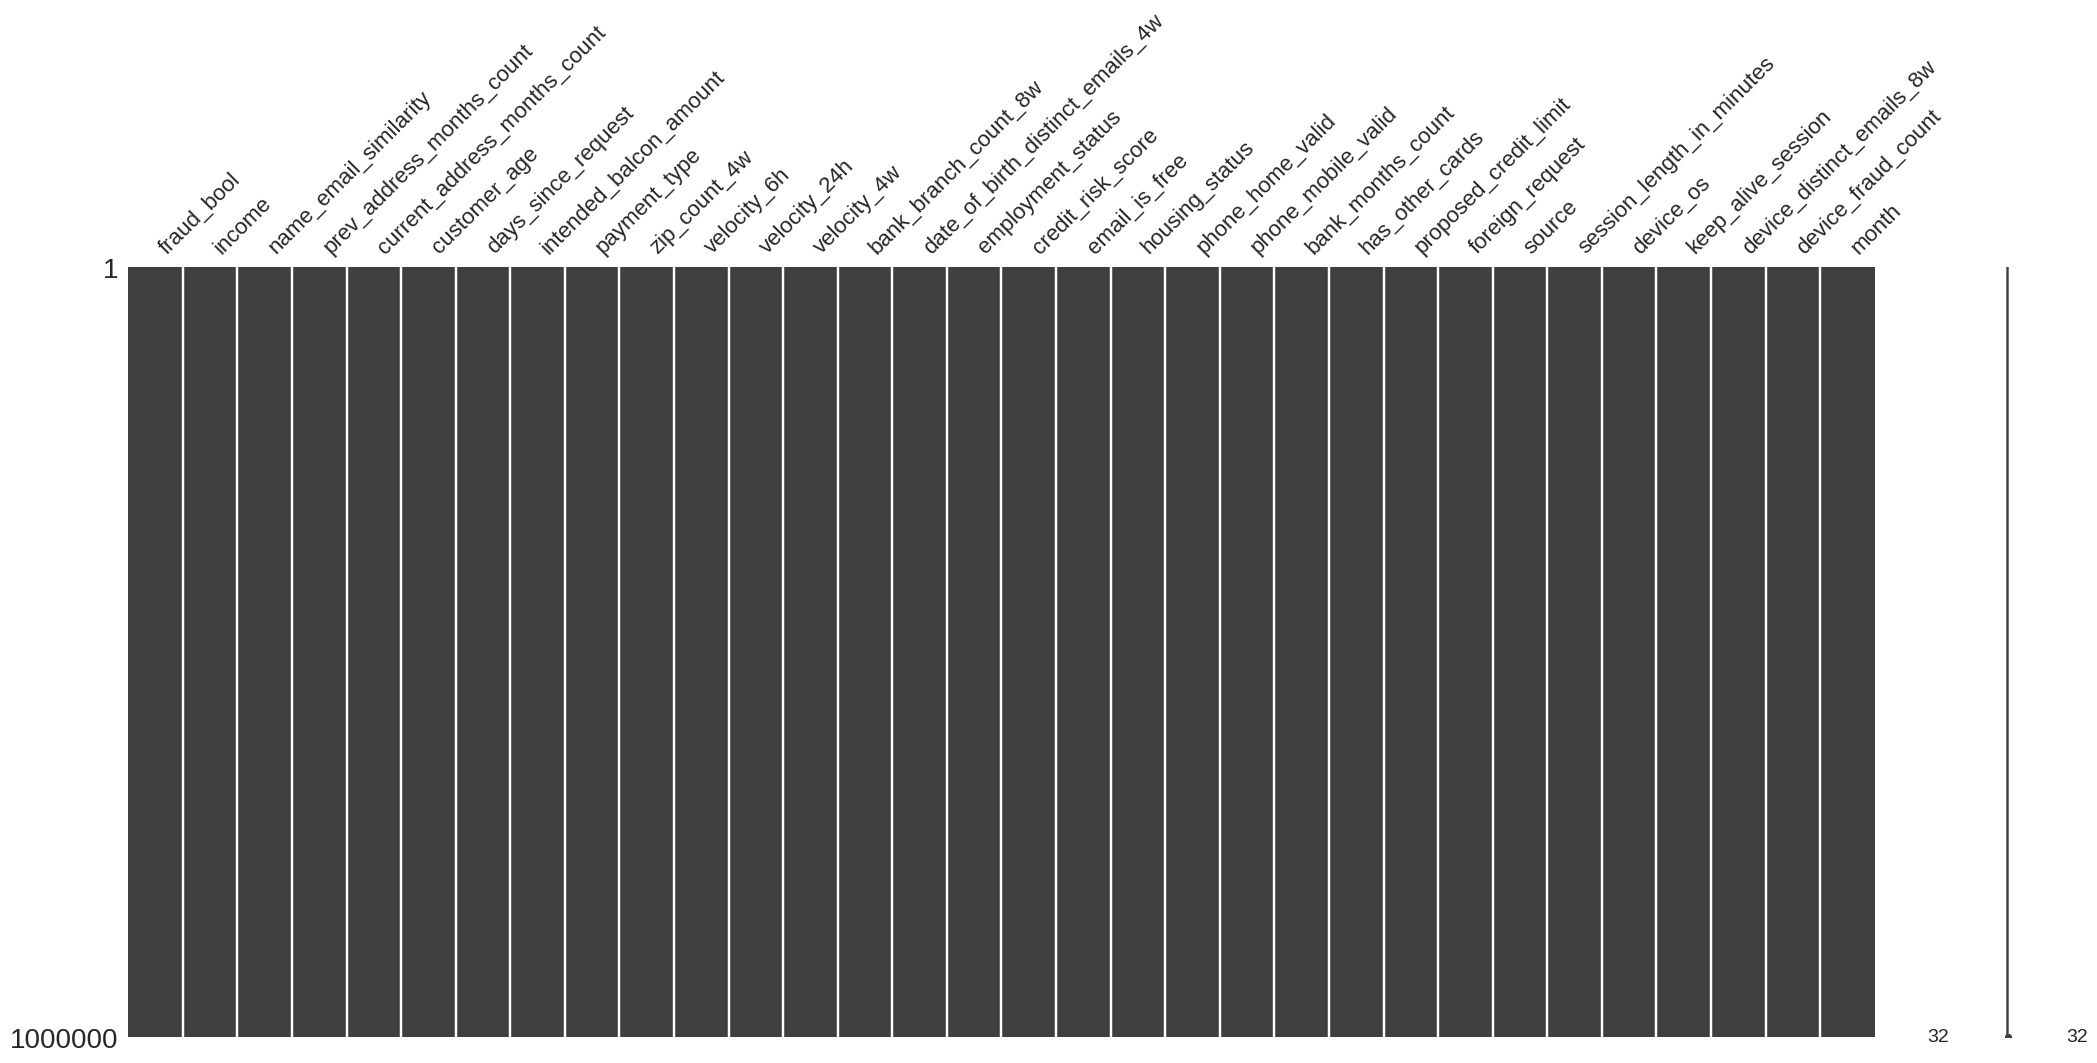

In [7]:
# Checando valores faltantes
import missingno as msno
msno.matrix(card_df)

## Processamento dos Dados

In [8]:
# Amostra aleatória de 50.000
card_df = card_df.sample(n=50000,random_state=42)
card_df.shape

(50000, 32)

In [9]:
# One Hot Encoding
# Binarização de variáveis categóricas
card_df = pd.get_dummies(card_df)
card_df.shape

(50000, 53)

In [10]:
# Skewness
numerical_cols = [cname for cname in card_df.loc[:, :'month'].columns if
                  pd.to_numeric(card_df[cname], errors='coerce').notna().all() and
                  card_df[cname].min() >= 0 and
                  card_df[cname].dtype in ['int64', 'float64']]

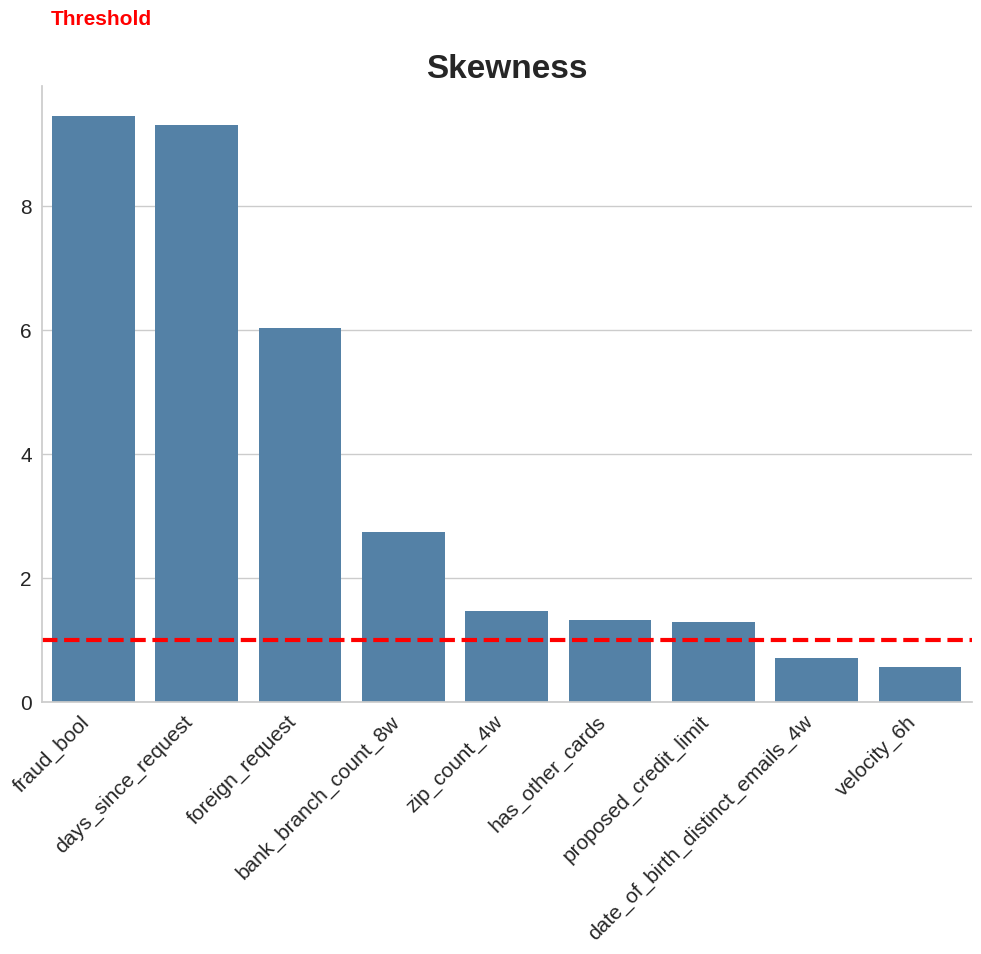

In [11]:
plt.figure(figsize=(12, 8))
skew_features = card_df[numerical_cols].apply(lambda x: skew(x))
skew_features = skew_features[skew_features > 0.5].sort_values(ascending=False)
ax = sns.barplot(x=skew_features.index, y=skew_features.values, color='SteelBlue')
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15)
ax.axhline(y=1, color='red', linestyle='--', linewidth=3)
ax.set_title('Skewness', ha = 'center', weight='bold', fontsize=24)
ax.text(0.01, 1.1, 'Threshold', color='red', transform=ax.transAxes, fontsize=15, weight='bold')
sns.despine()
plt.gca().set_facecolor('white')
plt.show()

In [12]:
# Check Feature Scaling
def check_normality(features, data_frame):
    for feature in features:
        plt.figure(figsize = (8,8))
        ax1 = plt.subplot(1,1,1)
        stats.probplot(data_frame[feature], dist=stats.norm, plot=ax1)
        ax1.set_title(f'{feature} Q-Q plot', fontsize=20)
        sns.despine()

        mean = data_frame[feature].mean()
        std = data_frame[feature].std()
        skew = data_frame[feature].skew()
        print(f'{feature} : mean: {mean:.4f}, std: {std:.4f}, skew: {skew:.4f}')

days_since_request : mean: 1.0286, std: 5.4340, skew: 9.3092
zip_count_4w : mean: 1566.5301, std: 1003.5601, skew: 1.4632
proposed_credit_limit : mean: 518.1238, std: 489.3567, skew: 1.2895


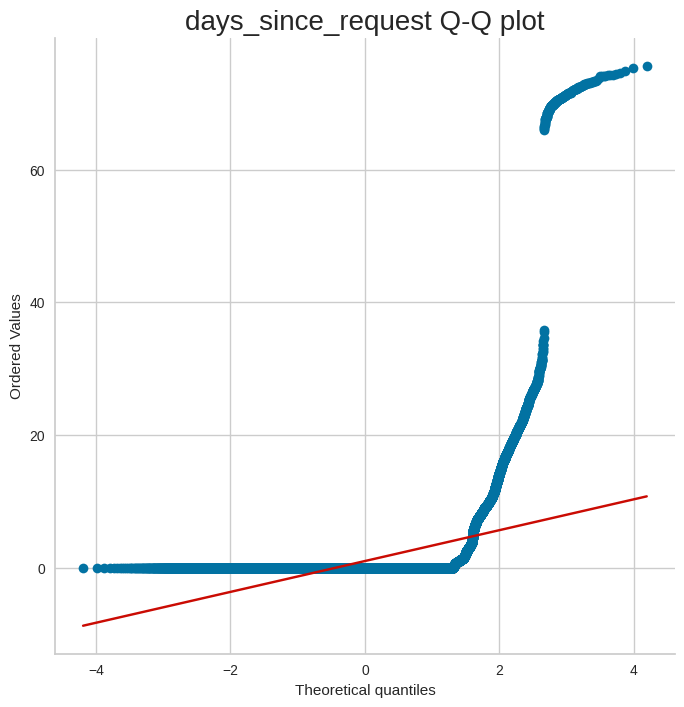

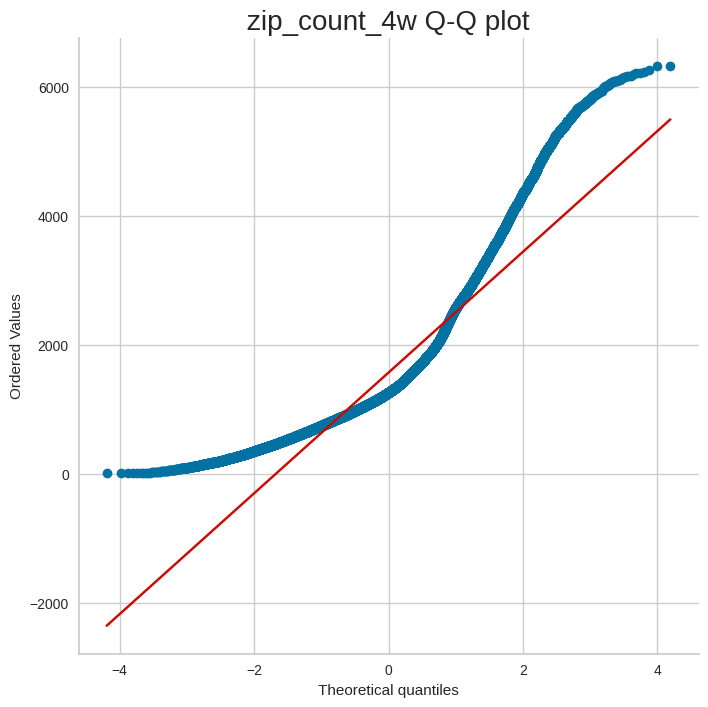

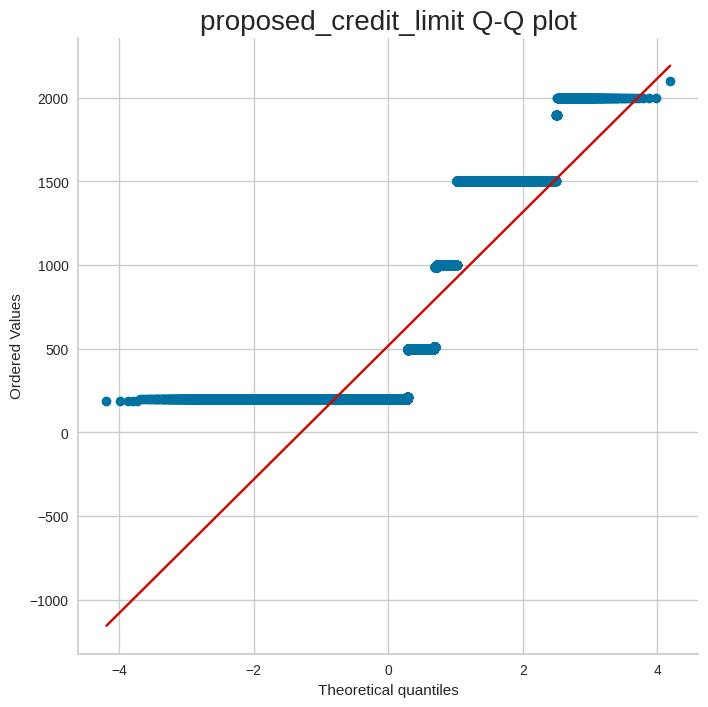

In [13]:
features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
check_normality(features, card_df)

In [14]:
def plot_histograms(features, data_frame, color=None):
    for feature in features:
        fig = px.histogram(data_frame, x=feature, color=color,
                            marginal="box",
                            barmode="overlay",
                            histnorm='density'
                            )
        fig.update_layout(
            title=f'Histogram of {feature}',
            xaxis_title=feature,
            yaxis_title='Density'
        )
        fig.show()

In [15]:
features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_histograms(features, card_df, color='fraud_bool')

In [16]:
# Escala logarítmica
columns_to_transform = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']

# Apply natural logarithm transformation to specified columns
card_df[columns_to_transform] = np.log1p(card_df[columns_to_transform])

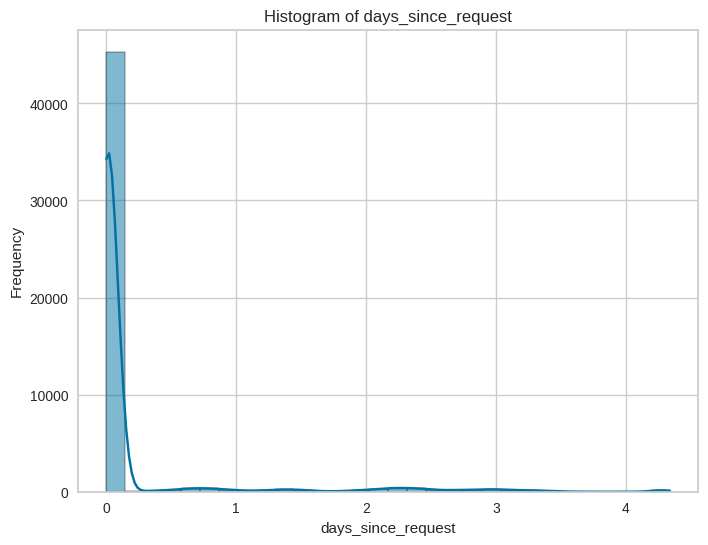

Normality test for days_since_request:
-------------------------------------
Skewness: 3.843942239073108
Kurtosis: 14.621545172487007
-------------------------------------



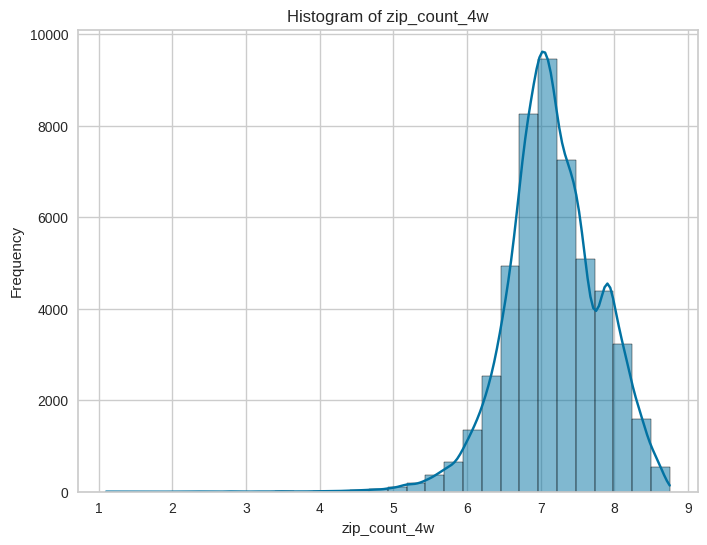

Normality test for zip_count_4w:
-------------------------------------
Skewness: -0.37609050053984006
Kurtosis: 1.5832117479917813
-------------------------------------



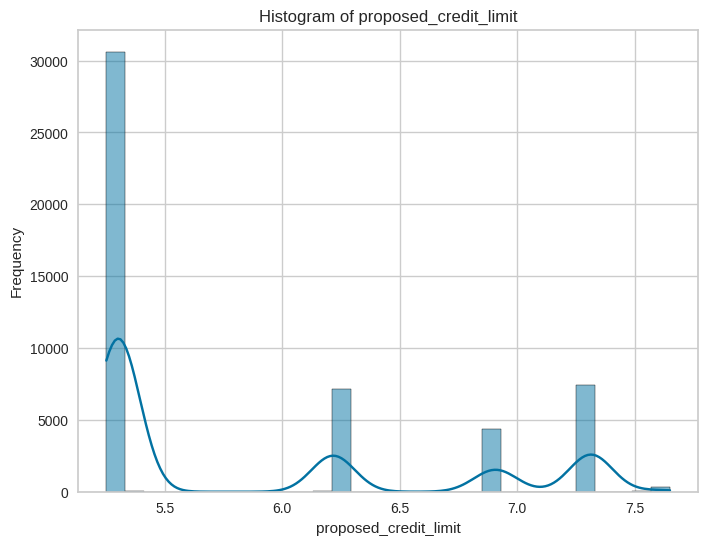

Normality test for proposed_credit_limit:
-------------------------------------
Skewness: 0.856013891952052
Kurtosis: -0.9455237923989972
-------------------------------------



In [17]:
# Define a function to plot histogram and check normality
def plot_hist_and_check_normality(df, cols):
    for col in cols:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        # Check normality
        print(f'Normality test for {col}:')
        print('-------------------------------------')
        print('Skewness:', skew(df[col]))
        print('Kurtosis:', df[col].kurtosis())
        print('-------------------------------------\n')

# Call the function with the desired variables
cols_to_plot = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_hist_and_check_normality(card_df, cols_to_plot)

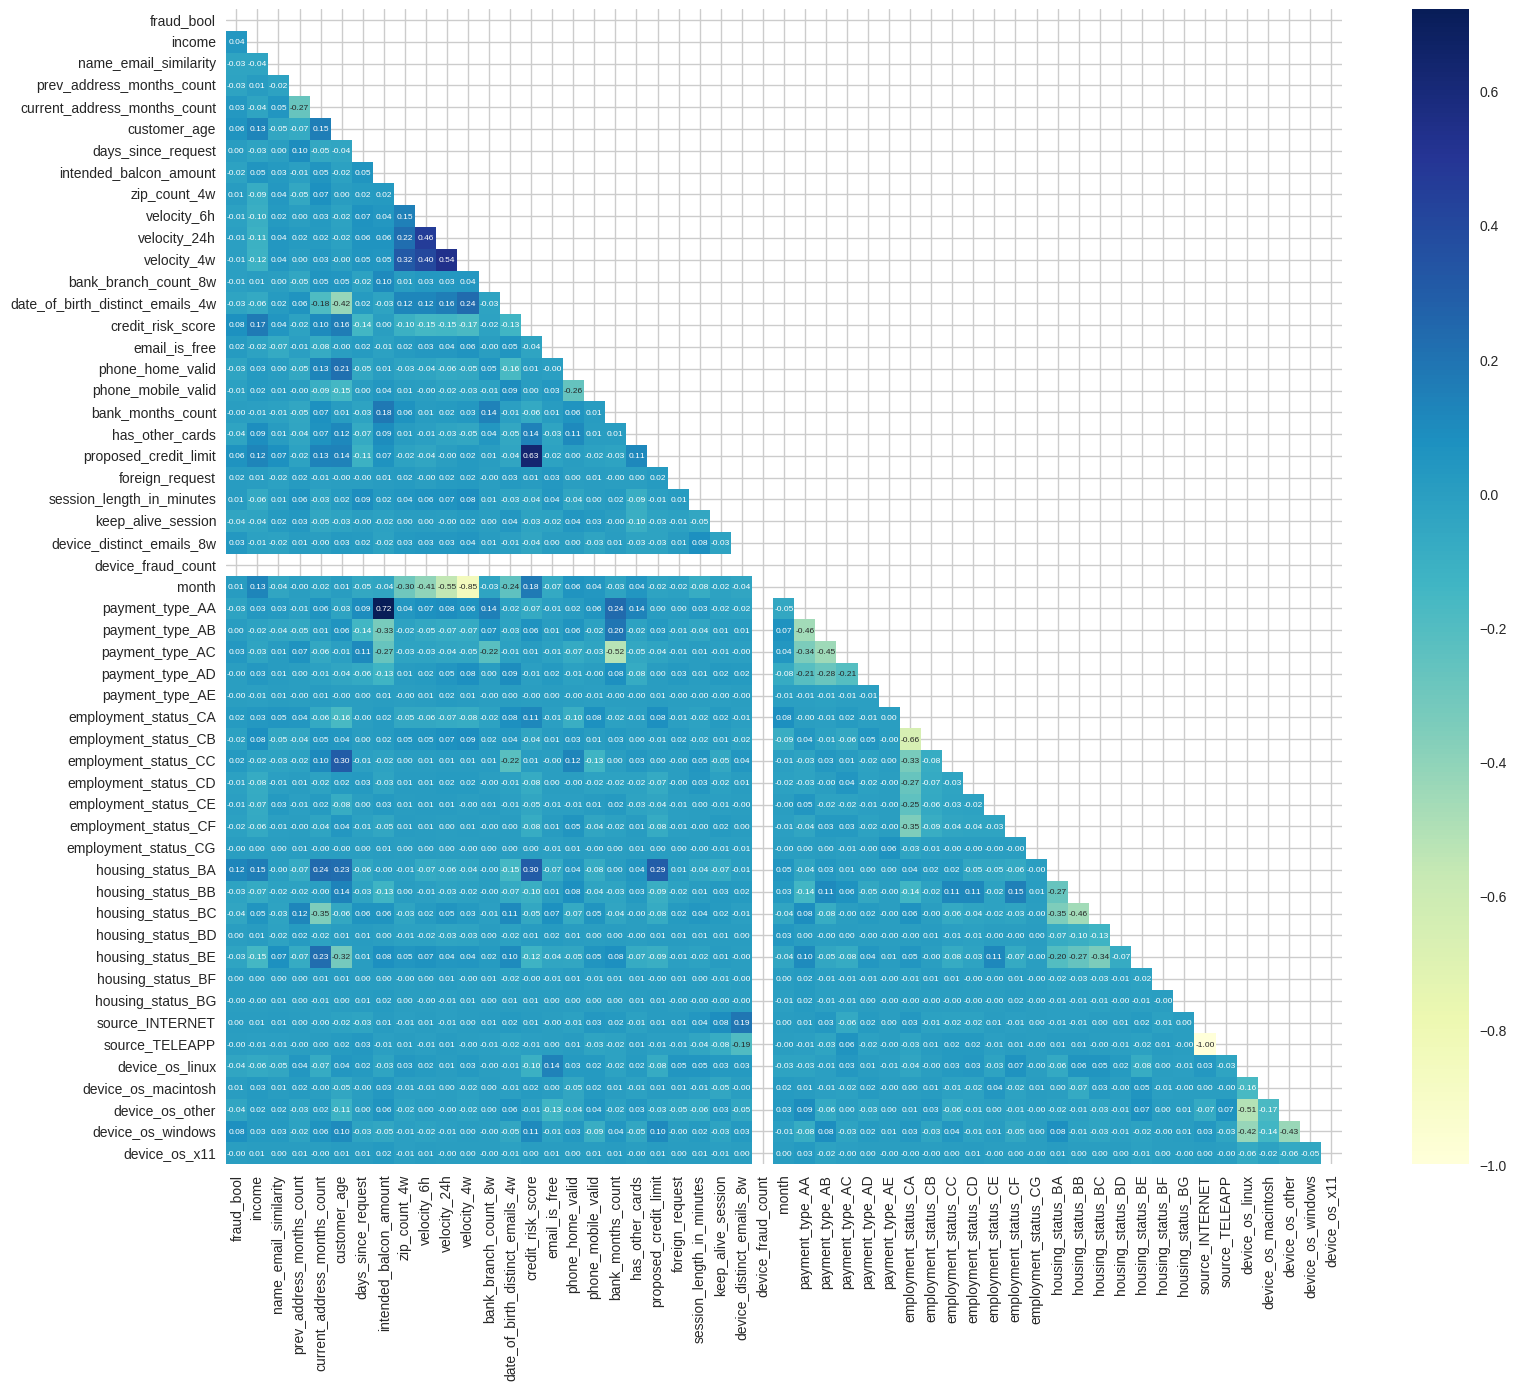

In [18]:
# Drop Highly Correlated Features
plt.figure(figsize=(18, 15))
cor = card_df.corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals
plt.show()

In [19]:
# Function to drop correlated features
def correlation(dataset, threshold):
    col_corr = set ()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(card_df, 0.7)
print(corr_features)

{'payment_type_AA'}


In [21]:
card_df = card_df.drop('payment_type_AA', axis=1)

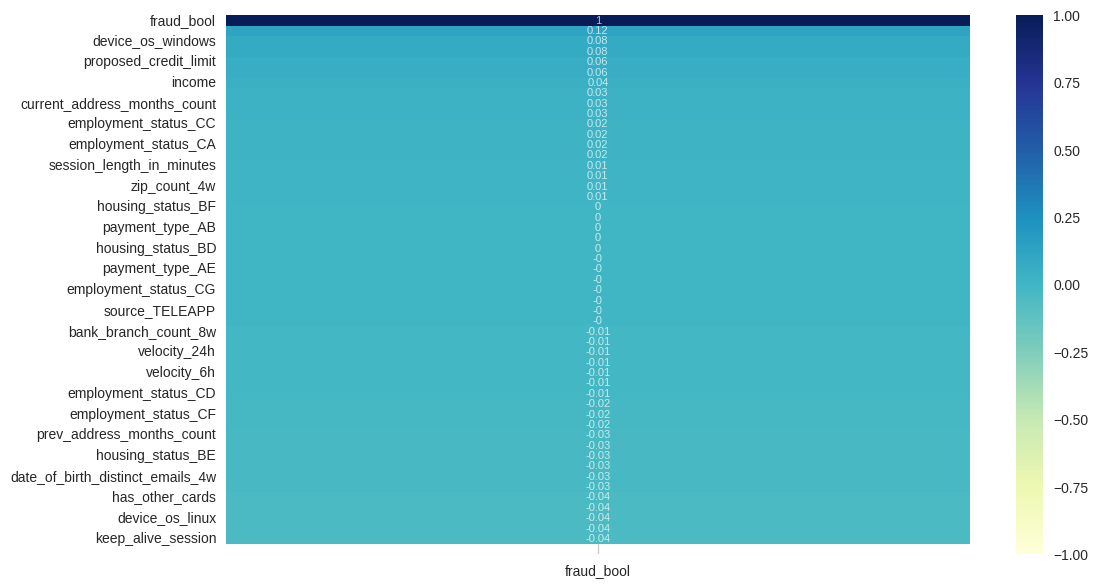

In [22]:
# Identificando as informações mais relevantes
plt.figure(figsize=(12, 7), dpi=100)
corr = card_df.corr()[['fraud_bool']].sort_values(by='fraud_bool', ascending=False)
corr = corr.round(2)
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu', annot_kws={"size": 8, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'})

In [23]:
corr = card_df.corr().round(1)

# Find features with strong correlation with target
target_corr = corr['fraud_bool'].abs().sort_values(ascending=False)
strong_corr_features = target_corr.index[1:11]

print('Top 10 features with highest correlation with target:')
for feature in strong_corr_features:
    print(f"{feature}: {target_corr[feature]}")

Top 10 features with highest correlation with target:
device_os_windows: 0.1
customer_age: 0.1
proposed_credit_limit: 0.1
housing_status_BA: 0.1
credit_risk_score: 0.1
housing_status_BB: 0.0
payment_type_AE: 0.0
employment_status_CA: 0.0
employment_status_CB: 0.0
employment_status_CC: 0.0


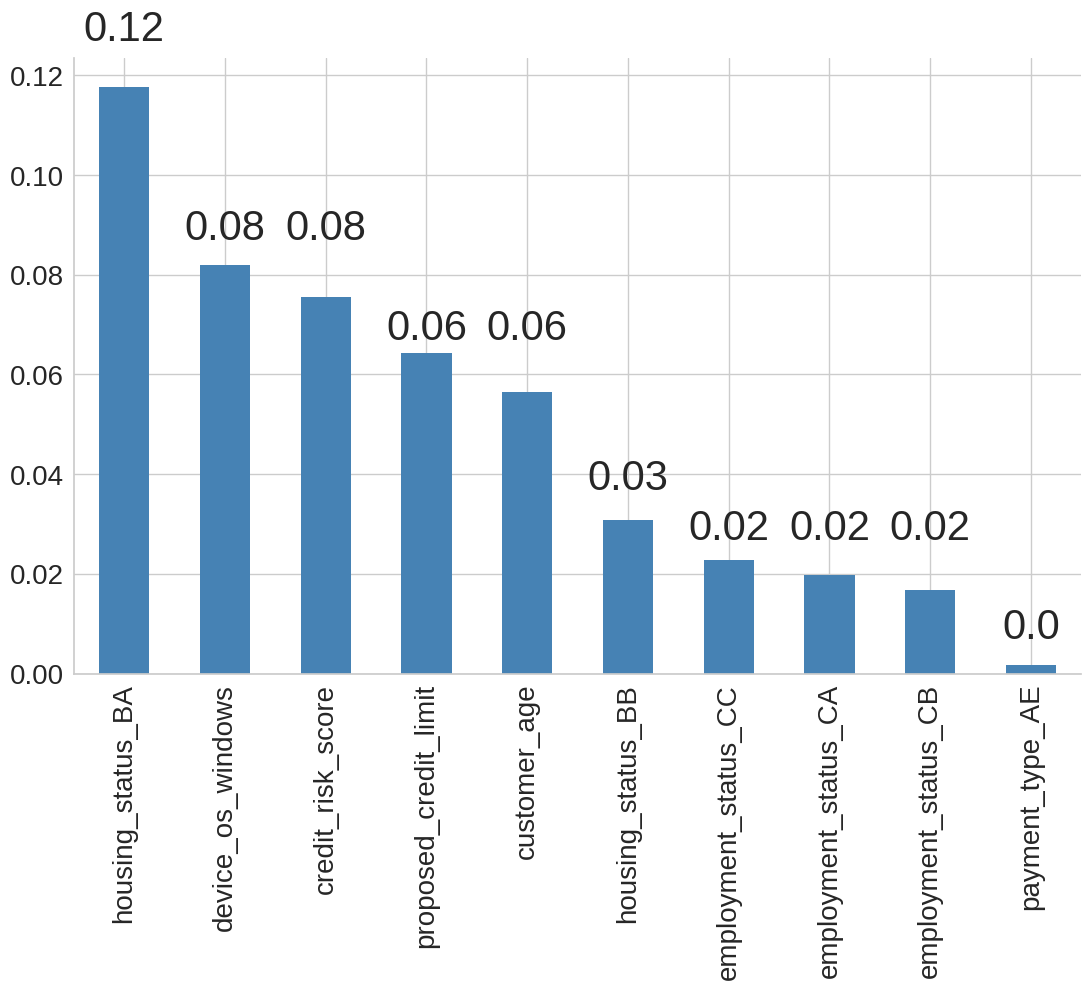

In [24]:
# Checando a importância das informações
features = [
    "device_os_windows",
    "customer_age",
    "proposed_credit_limit",
    "housing_status_BA",
    "credit_risk_score",
    "housing_status_BB",
    "payment_type_AE",
    "employment_status_CA",
    "employment_status_CB",
    "employment_status_CC",
]

plt.figure(figsize=(13,8))
ax = abs(card_df[features].corrwith(card_df.fraud_bool)).sort_values(ascending=False).plot(kind='bar',color='SteelBlue',fontsize=20)
for p in ax.patches:
    height = p.get_height().round(2)
    ax.text(p.get_x() + p.get_width() / 2., height+0.007, height, ha = 'center', size = 30)
sns.despine()

## Classificação desbalanceada

In [37]:
# Splitting Train e teste de Dataset
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # Set 'fraud_bool' as the target variable by moving it to the first column
    target_col = df_copy.pop('fraud_bool')
    df_copy.insert(0, 'fraud_bool', target_col)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, 1:]  # Exclude only the first column
    y_target = df_copy.iloc[:, 0]  # Use the first column as y-axis
    X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                        y_target,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y_target)
    return X_train, X_test, y_train, y_test

In [38]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [39]:
# Histograma
fig = px.histogram(card_df, x="customer_age",
                   color="fraud_bool",
                   marginal="box",
                   barmode="overlay",
                   histnorm='density'
                  )
fig.update_layout(
    title_text="Original Distribution",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)
fig.show()

In [40]:
# Scatterplot
fig = px.scatter(card_df, x="customer_age", y="credit_risk_score", color="fraud_bool")
fig.update_layout(
    title_text="",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)

In [41]:
# Oversampling com SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote,y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())
card_df_smote = pd.concat([X_train_smote, pd.DataFrame(y_train_smote, columns=['fraud_bool'])], axis=1)

Feature/label dataset for training before applying SMOTE:  (35000, 51) (35000,)
Feature/label dataset for training after applying SMOTE:  (69242, 51) (69242,)
Distribution of label values after applying SMOTE:
 0    34621
1    34621
Name: fraud_bool, dtype: int64


In [42]:
# Scatterplot
fig = px.scatter(card_df_smote, x="customer_age", y="credit_risk_score", color="fraud_bool")
fig.update_layout(
    title_text="",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)

In [43]:
# Redução de dimensão com UMAP

#!pip install umap-learn[plot]

#sns.set(style="ticks", context="talk",font_scale = 1)
#plt.style.use("default")

#mapper = umap.UMAP().fit(card_df_smote.loc[:,:'month'])
#umap.plot.points(mapper, labels=card_df_smote.loc[:,'fraud_bool'])

In [44]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (35000, 51) (35000,)
Feature/label dataset for training after applying SMOTE:  (69242, 51) (69242,)
Distribution of label values after applying SMOTE:
 0    34621
1    34621
Name: fraud_bool, dtype: int64


In [45]:
# Analisando resultados
train_df =pd.concat([X_train_smote,y_train_smote],axis=1)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [46]:
colors = ['SteelBlue', '#004B87']
labels = ['Non-Fraud','Fraud']
values = train_df['fraud_bool'].value_counts() / train_df['fraud_bool'].shape[0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=2)))
fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

fig.show()

In [47]:
classifier = setup(data=train_df, preprocess=False, target='fraud_bool', verbose=0)

## Seleção de Modelo

In [48]:
decisiontree = create_model('dt') # decision tree
gbm = create_model('gbc') # gradient boosting machine
logisticregression = create_model('lr') # logistic regression

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
# Tuning de hiperparâmetro
tuned_decisiontree = tune_model(decisiontree, optimize = 'AUC')
tuned_gradientboosting = tune_model(gbm, optimize = 'AUC')
tuned_logisticregression = tune_model(logisticregression, optimize = 'AUC')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


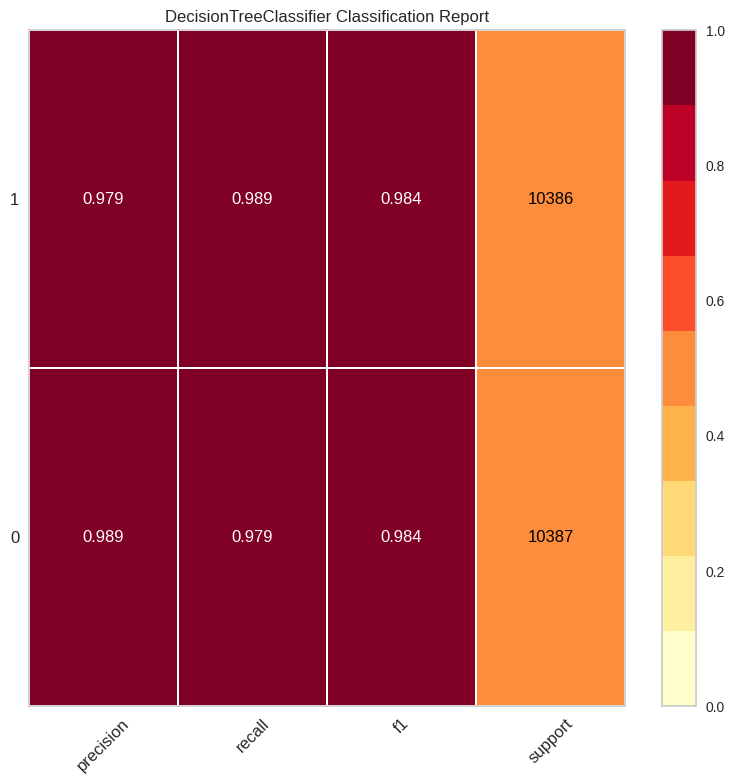

In [56]:
# Intepretando Modelos
# Decision Tree
plt.figure(figsize=(8, 8))
plot_model(tuned_decisiontree, plot='class_report')

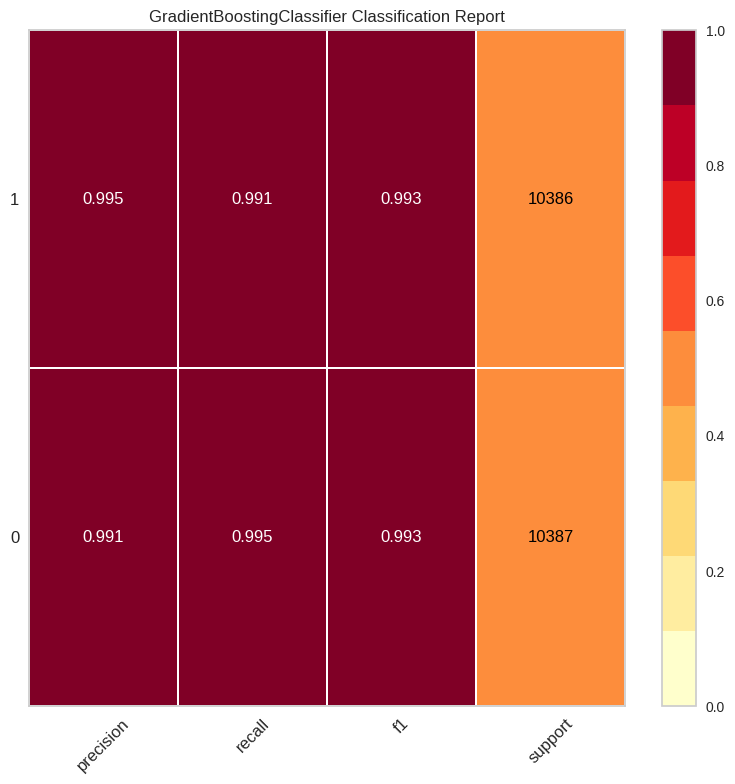

In [57]:
# GBM
plt.figure(figsize=(8, 8))
plot_model(tuned_gradientboosting, plot='class_report')

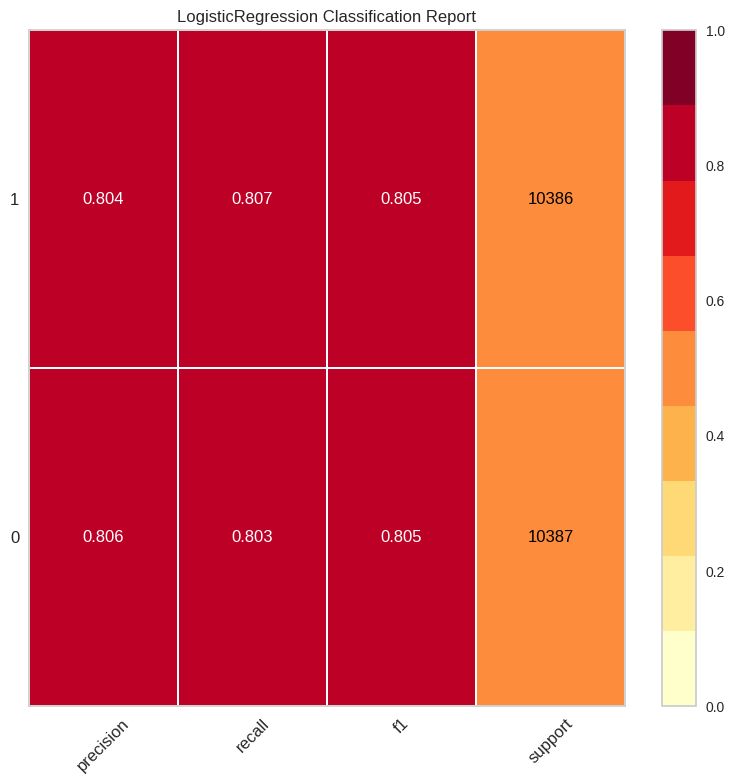

In [58]:
# Logistic Regression
plt.figure(figsize=(8, 8))
plot_model(tuned_logisticregression, plot='class_report')

## Avaliação de Modelo

### Decision Tree

In [59]:
pred = tuned_decisiontree.predict(X_test_smote)

In [60]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9210, precision: 0.9762, recall: 0.8631,F1: 0.9162


Text(0.5, 1.0, 'Confusion Matrix (Decision Tree Classifier)')

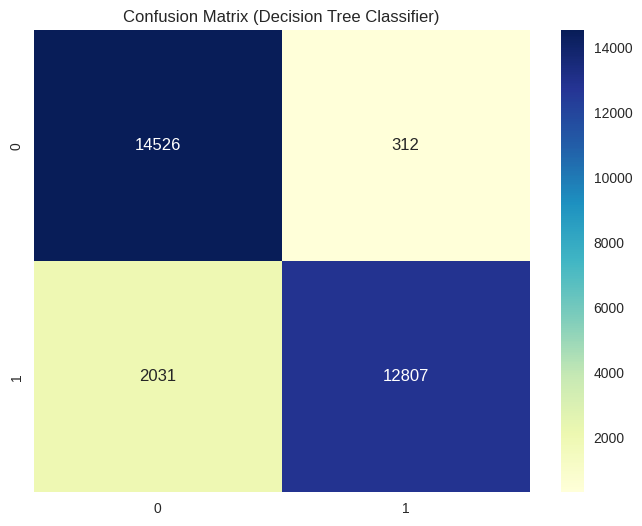

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Decision Tree Classifier)')

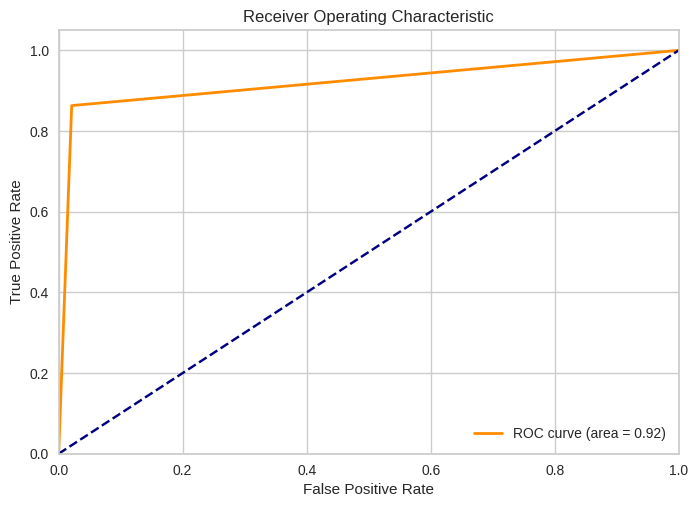

AUC: 0.9210


In [62]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

### Gradient Boost Machine

In [63]:
pred = tuned_gradientboosting.predict(X_test_smote)

In [64]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9673, precision: 0.9951, recall: 0.9392,F1: 0.9663


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

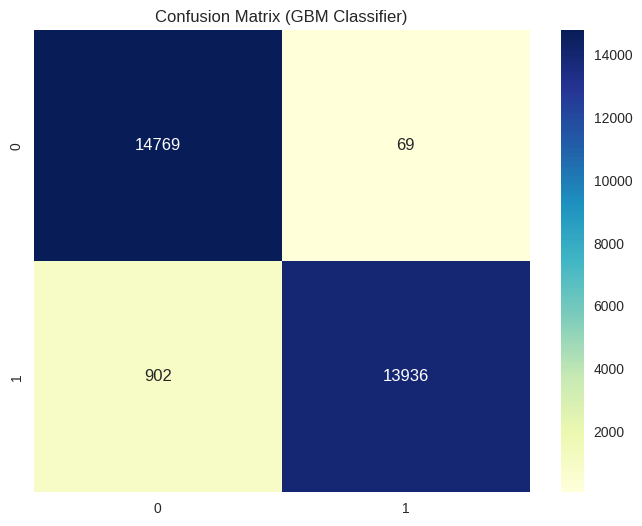

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (GBM Classifier)')

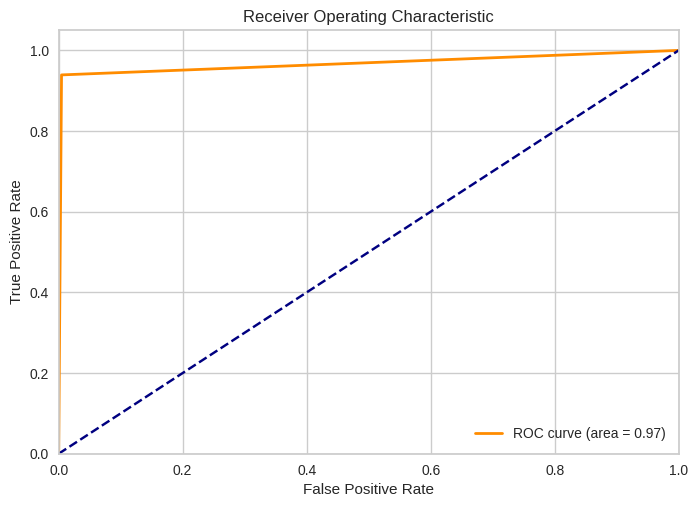

AUC: 0.9673


In [66]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

### Logistic Regression

In [67]:
pred = tuned_logisticregression.predict(X_test_smote)

In [68]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8098, precision: 0.8040, recall: 0.8192,F1: 0.8116


Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)')

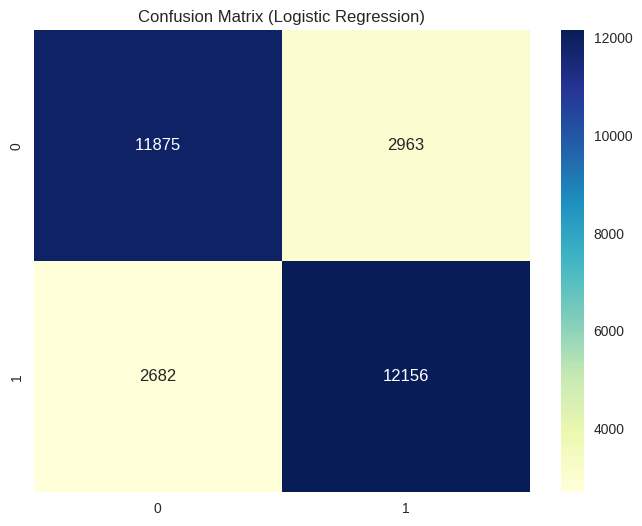

In [69]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Logistic Regression)')

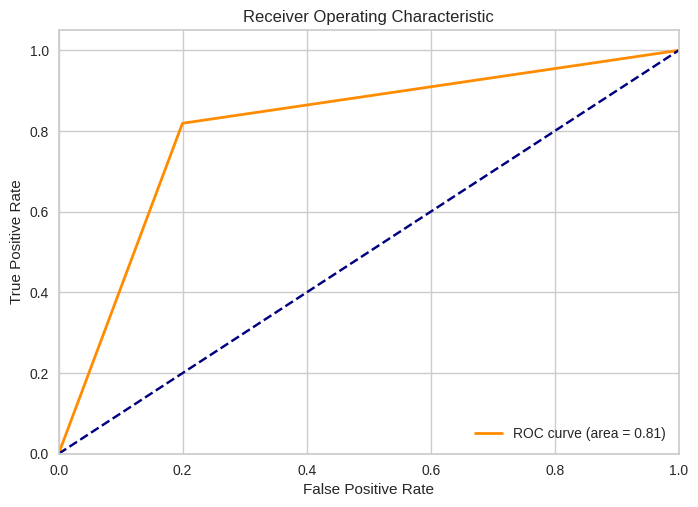

AUC: 0.8098


In [70]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

## Conclusão

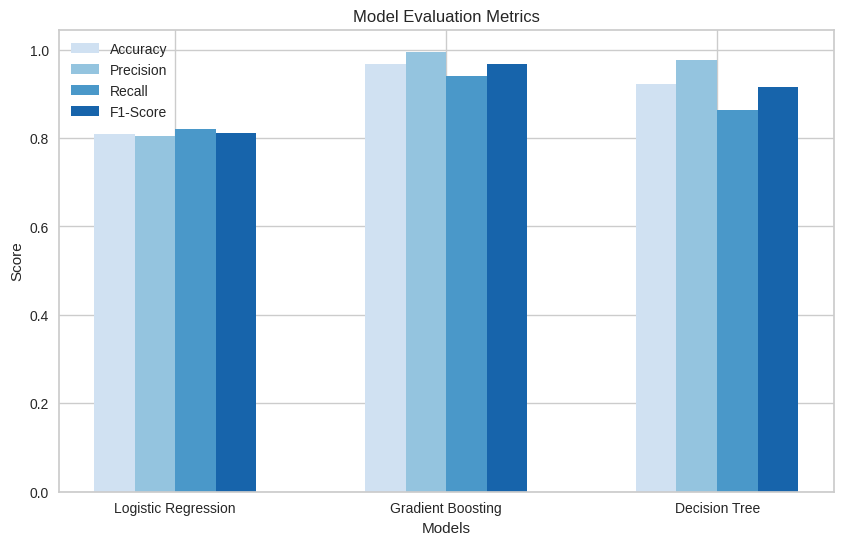

In [71]:
# Calculate evaluation metrics for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

scores = []

for model in models:
    y_pred = model.predict(X_test_smote)
    accuracy = accuracy_score(y_test_smote, y_pred)
    precision = precision_score(y_test_smote, y_pred)
    recall = recall_score(y_test_smote, y_pred)
    f1 = f1_score(y_test_smote, y_pred)
    scores.append([accuracy, precision, recall, f1])

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(metrics)))

# Plot the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.15

for i, metric in enumerate(metrics):
    plt.bar(x + (i * width), [score[i] for score in scores], width, label=metric, color=colors[i])

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(x + (width * 1.5), model_names)
plt.legend()

plt.show()

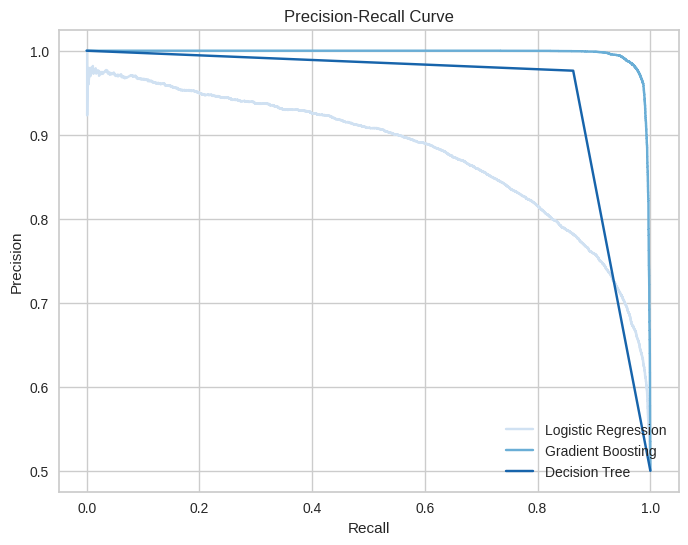

In [72]:
# Calculate precision and recall for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_smote, y_pred_prob)
    plt.plot(recall, precision, label=name, color=color)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')

plt.show()

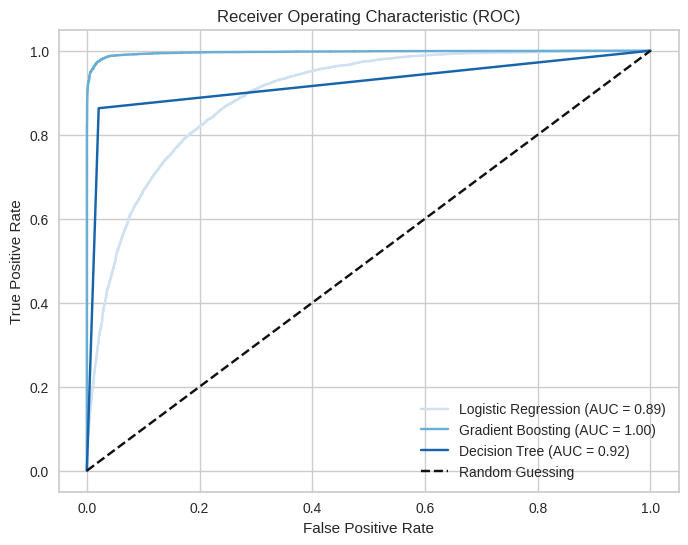

In [73]:
# Calculate the ROC curve and AUC for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_smote, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()